In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('cmu_paper')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# MPAA-v0

In [8]:
def extract_plot_stats(path):
    window = 100
    ep_stats = ['hist_stats/episode_reward']
    train_data = pd.read_csv(path + '/progress.csv')
    for i in ep_stats:
        vals = None
        ep_vals = train_data[i].values
        for j in ep_vals:
            ep_vals = np.array(re.findall(r"[-+]?\d*\.\d+|\d+", j)).astype(float)
            if vals is None:
                vals = ep_vals.copy()
            else:
                vals = np.hstack([vals, ep_vals.copy()])

    reward_var = np.array([np.std(vals[i-window:i+1]) 
                           if i>window else np.std(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    med_reward = np.array([np.median(vals[i-window:i+1]) 
                           if i>window else np.median(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_max = np.array([np.max(vals[i-window:i+1]) 
                           if i>window else np.max(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_min = np.array([np.min(vals[i-window:i+1]) 
                           if i>window else np.min(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    mean_vals = np.array([np.mean(vals[i-window:i+1]) 
                           if i>window else np.mean(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    fill_max = mean_vals + reward_var
    fill_min = mean_vals - reward_var
#     if np.max(mean_vals) > 0:
#         fill_max = np.where(mean_vals + reward_var<=ep_max, mean_vals+reward_var, ep_max)
#         fill_min = np.where(mean_vals - reward_var>0, mean_vals-reward_var, 0)
#     else:
#         fill_max = np.where(mean_vals + reward_var<=0, mean_vals+reward_var, ep_max)
#         fill_min = np.where(mean_vals - reward_var>ep_min, mean_vals-reward_var, ep_min)
        
    data_dict = {'mean_rewards': mean_vals, 
                 'med_rewards': med_reward,
                 'std_rewards': reward_var,
                 'ep_min': ep_min, 
                 'ep_max': ep_max, 
                 'fill_max': fill_max, 
                 'fill_min': fill_min}
    return pd.DataFrame(data_dict)

In [9]:
# p0 = extract_plot_stats('/home/christian/PPO_POEnv_2020-07-11_16-21-04817dahou/')
p0 = extract_plot_stats('/home/christian/PPO_POEnv_2020-07-19_10-50-34e7a81co4')

/home/christian/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


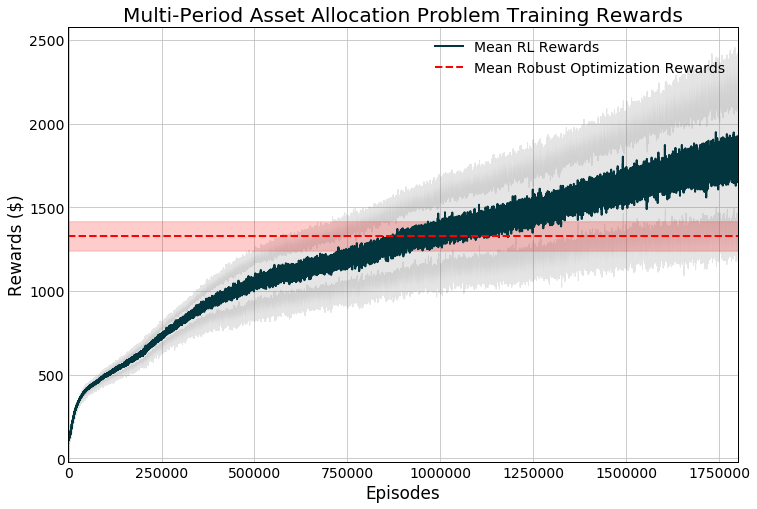

In [18]:
# Get episode totals
x_min = -1000
x_max = len(p0['mean_rewards'])
# opt_mean = -438.8
# opt_var = 111
heur_mean = 1329
heur_var = 87.9

linestyles = ['--', '-.', ':', '-']

plt.figure(figsize=(12,8))
plt.plot(p0['mean_rewards'], label='Mean RL Rewards')
plt.fill_between(np.arange(p0.shape[0]), p0['fill_min'], p0['fill_max'],
                 color='gray', alpha=0.2)

plt.axhline(xmin=0, xmax=x_max, y=heur_mean, 
            color='r', linestyle=linestyles[0],
            label='Mean Robust Optimization Rewards')
plt.fill_between(np.arange(x_min, x_max), heur_mean-heur_var, 
                 heur_mean+heur_var, color='r', alpha=0.2)

# plt.axhline(xmin=0, xmax=x_max, y=opt_mean, 
#             color='orange', linestyle=linestyles[2],
#             label='Mean Optimal Reward')
# plt.fill_between(np.arange(x_min, x_max), opt_mean-opt_var, 
#                  opt_mean+opt_var, color='orange', alpha=0.2)

plt.title('Multi-Period Asset Allocation Problem Training Rewards')
# plt.legend(bbox_to_anchor=[1.05, 0.75])
plt.legend()
plt.ylabel('Rewards ($)')
plt.xlabel('Episodes')
plt.xlim([x_min, x_max])
plt.show()

In [11]:
p0.head()

,mean_rewards,med_rewards,std_rewards,ep_min,ep_max,fill_max,fill_min
0,114.005455,114.005455,0.000000,114.005455,114.005455,114.005455,114.005455
1,115.017931,115.017931,1.012476,114.005455,116.030406,116.030406,114.005455
2,122.528865,116.030406,10.654185,114.005455,137.550733,133.183050,111.874680
3,116.290073,115.017931,14.209199,97.573697,137.550733,130.499271,102.080874
4,117.905307,116.030406,13.113237,97.573697,137.550733,131.018543,104.792070


In [17]:
np.where(p0['fill_max'] < p0['fill_min'])

(array([], dtype=int64),)

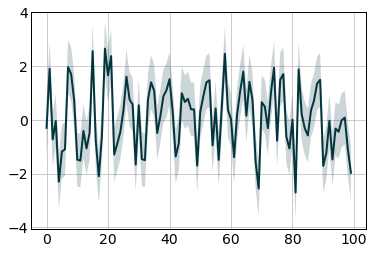

In [16]:
x = np.arange(100)
y = np.sin(x) + np.random.normal(size=100)
y_min = y - 1
y_max = y + 1

plt.figure()
plt.plot(x, y)
plt.fill_between(x, y_min, y_max, alpha=0.2)
plt.show()